<a href="https://colab.research.google.com/github/Nduta-Nduta/Vibe-Mate/blob/master/Vibe_Mate_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px


In [2]:
data = pd.read_csv("dataset.csv")

print("✅ Dataset loaded")
print(data.head(2))


✅ Dataset loaded
   Unnamed: 0                track_id       artists        album_name  \
0           0  5SuOikwiRyPMVoIQDJUgSV   Gen Hoshino            Comedy   
1           1  4qPNDBW1i3p13qLCt0Ki3A  Ben Woodward  Ghost (Acoustic)   

         track_name  popularity  duration_ms  explicit  danceability  energy  \
0            Comedy          73       230666     False         0.676   0.461   
1  Ghost - Acoustic          55       149610     False         0.420   0.166   

   ...  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...    -6.746     0       0.1430        0.0322          0.000001     0.358   
1  ...   -17.235     1       0.0763        0.9240          0.000006     0.101   

   valence   tempo  time_signature  track_genre  
0    0.715  87.917               4     acoustic  
1    0.267  77.489               4     acoustic  

[2 rows x 21 columns]


In [6]:
print(data.columns.tolist())


['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [7]:
data[['album_name', 'track_name']].head(20)


,album_name,track_name
0,Comedy,Comedy
1,Ghost (Acoustic),Ghost - Acoustic
2,To Begin Again,To Begin Again
3,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,Hold On,Hold On
5,Days I Will Remember,Days I Will Remember
6,Is There Anybody Out There?,Say Something
7,We Sing. We Dance. We Steal Things.,I'm Yours
8,We Sing. We Dance. We Steal Things.,Lucky
9,Hunger,Hunger


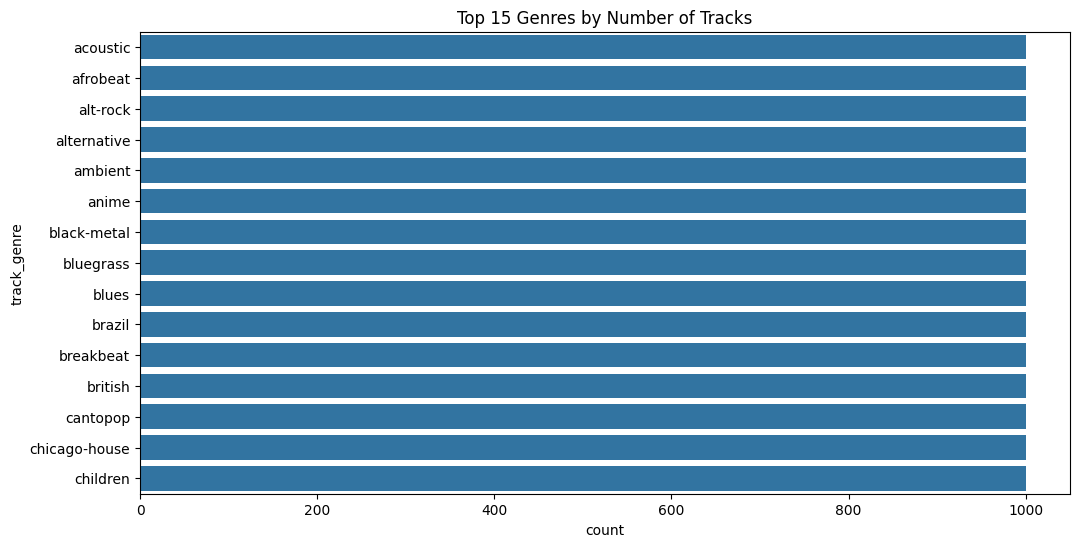

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(y='track_genre', data=data, order=data['track_genre'].value_counts().index[:15])
plt.title("Top 15 Genres by Number of Tracks")
plt.show()


In [9]:
# Check the distribution of genres
genre_counts = data['track_genre'].value_counts()
print(genre_counts.head(20))


track_genre
acoustic         1000
afrobeat         1000
alt-rock         1000
alternative      1000
ambient          1000
anime            1000
black-metal      1000
bluegrass        1000
blues            1000
brazil           1000
breakbeat        1000
british          1000
cantopop         1000
chicago-house    1000
children         1000
chill            1000
classical        1000
club             1000
comedy           1000
country          1000
Name: count, dtype: int64


/tmp/ipython-input-109810486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_genres.values, y=top10_genres.index, palette="viridis")


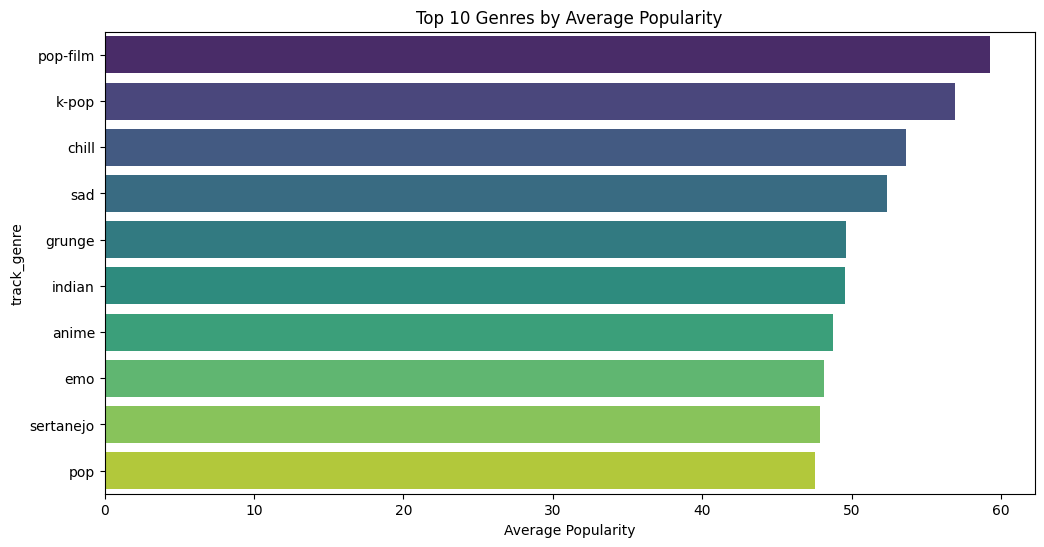

In [10]:
top10_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_genres.values, y=top10_genres.index, palette="viridis")
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.show()


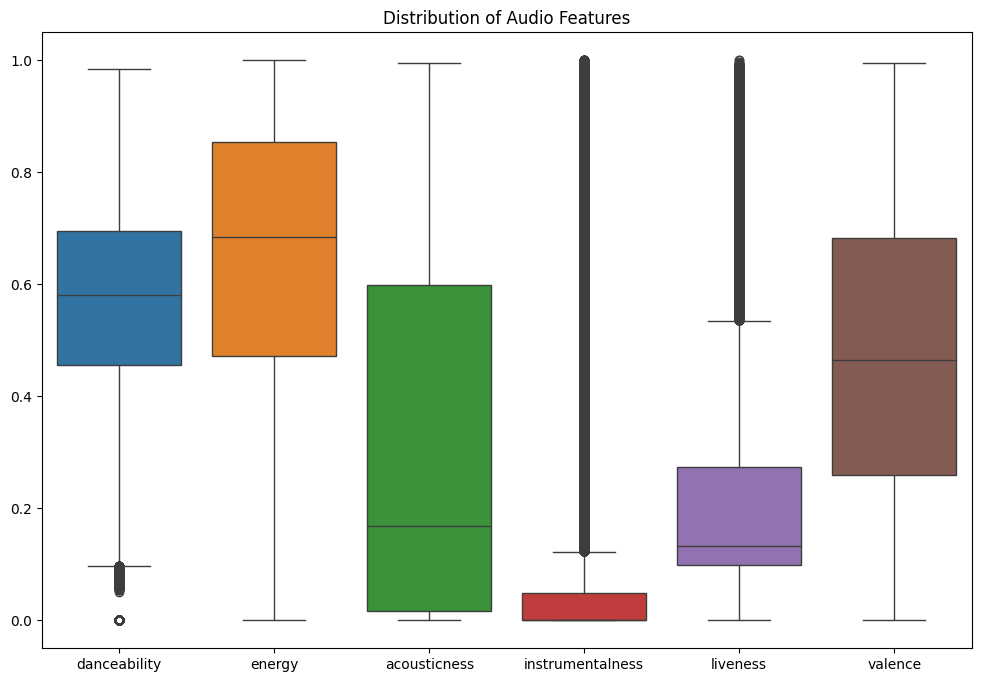

In [11]:
sound_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(12,8))
sns.boxplot(data=data[sound_features])
plt.title("Distribution of Audio Features")
plt.show()


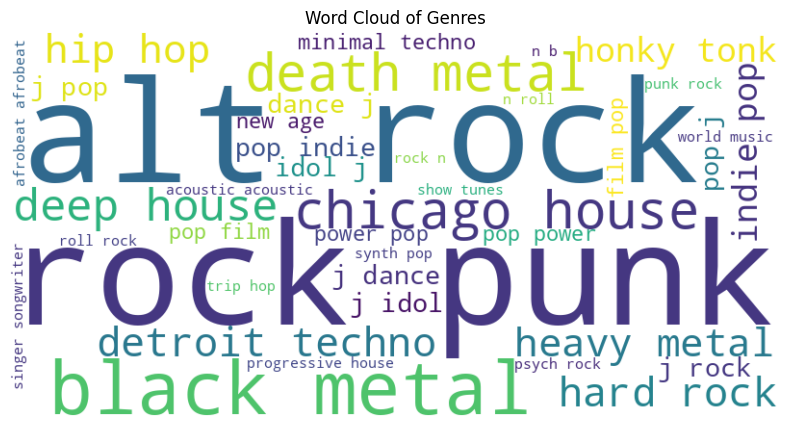

In [12]:
comment_words = ' '.join(data['track_genre'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, max_words=40).generate(comment_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Genres")
plt.show()


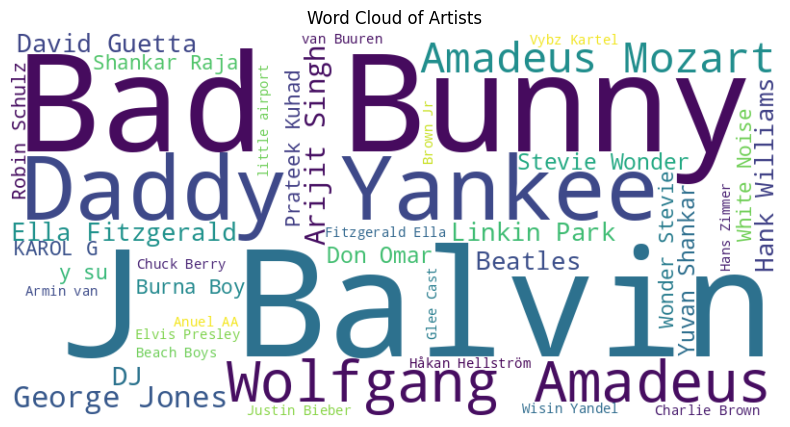

In [13]:
comment_words = ' '.join(data['artists'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, max_words=40).generate(comment_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Artists")
plt.show()


/tmp/ipython-input-1957830024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_artists_count.values, y=top10_artists_count.index, palette="coolwarm")


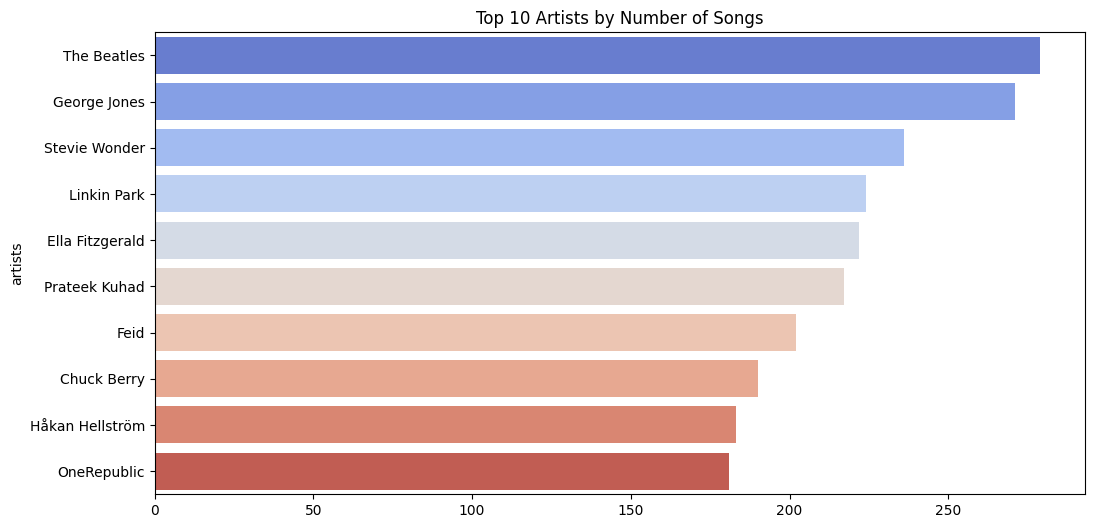

In [14]:
top10_artists_count = data['artists'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_artists_count.values, y=top10_artists_count.index, palette="coolwarm")
plt.title("Top 10 Artists by Number of Songs")
plt.show()


/tmp/ipython-input-725693683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_popular_artists.values, y=top10_popular_artists.index, palette="magma")


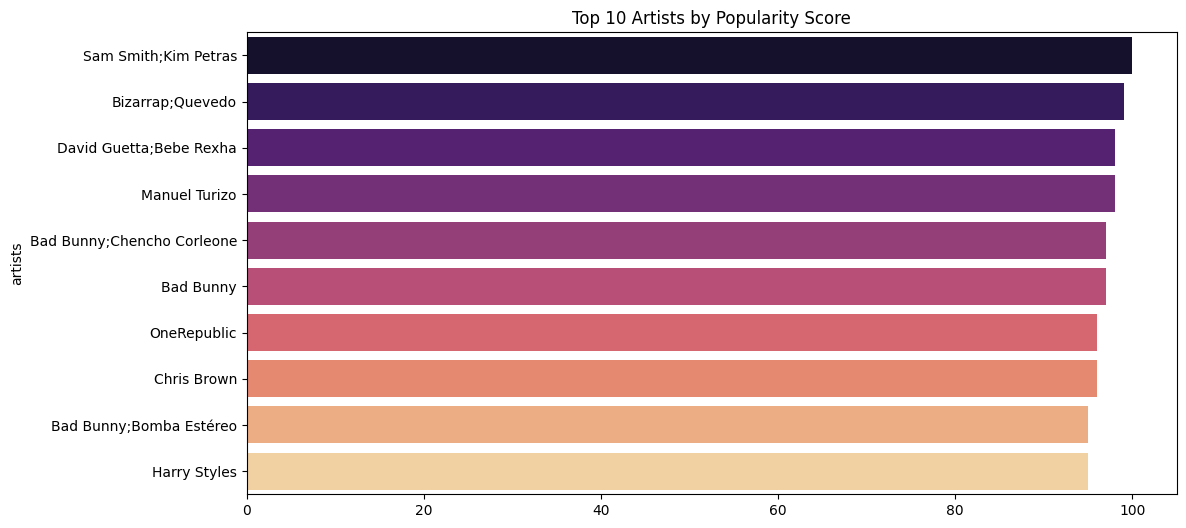

In [15]:
top10_popular_artists = data.groupby('artists')['popularity'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_popular_artists.values, y=top10_popular_artists.index, palette="magma")
plt.title("Top 10 Artists by Popularity Score")
plt.show()


In [ ]:
### 📝 Phase 2 Conclusion
#From the exploratory analysis, we can draw the following insights:  #

#Balanced Dataset**
   # Each genre in this dataset contains roughly the same number of tracks (~1000).
   # This indicates that the dataset was curated to avoid imbalance, which is useful for fair comparisons but means genre counts do not reflect real-world Spotify distributions. #

#*Audio Feature Patterns Across Genres**
   # Genres show clear differences in sound features:
  #Acoustic genres** tend to have high `acousticness` and lower `energy`.
     #Electronic and dance genres** score high on `energy` and `danceability`.
     #Alternative/indie genres** often balance between `acousticness` and `energy`.  #

#*Loudness Insights*
  # Loudness correlates with genre characteristics: acoustic and instrumental tracks are generally softer, while rock, pop, and EDM are consistently louder.  #

#*Popularity Trends**
   #Even in a balanced dataset, some genres/artists stand out in **popularity scores**.
   #This reflects real-world listener preferences captured by Spotify.  #

# *Artists*
   #The **most prolific artists** (with the highest track counts) differ from the **most popular artists*.  #
  #This shows that producing more songs does not necessarily guarantee higher popularity.  #

# *Word Clouds*
   #The word clouds provided a **visual overview** of genre and artist diversity.
   -#They highlighted the presence of both mainstream and niche music styles in the dataset. ##

##Overall, Phase 2 allowed us to understand how genres and artists compare in terms of track availability, popularity, and audio characteristics. These insights form a strong foundation for deeper analysis in later phases.  ##
